## RNN(Recurrent Neural Network)
- 순환신경망이라고 한다.( recurrent => 반복되는/ 되풀이 되는 )
- sequence data( 순서가 있는 데이터를 의미한다.)
- t => 보통 타이밍이라고 한다.
- cell => 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 수행. 메모리 셀 또는 RNN 셀이라고 표현
- RNN은 입력과 출력의 길이를 다르게 설계 할 수 있으므로 다양한 용도로 사용할 수 있다.
- keras로 RNN층을 추가하는 코드 => model.add(simpleRNN(hidden_size)
- timesteps = 입력 시퀀스의 길이(input_length)라고 표현하기도 함
- RNN층은 사용자의 설정에 따라 두 가지 종류의 출력을 내보낸다.
- SimpleRNN => 이전 은닉층의 상태의 값이 다음 은닉층의 값에 영향을 미친다.
- 시간의 흐름이 중요한 것들은 RNN과 LSTN을 사용하면 좋다

In [1]:
 # RNN 층에 대한 코드
from keras.models import Sequential
from keras.layers import SimpleRNN
# RNN은 은닉상태의 값이 재사용이 가능하다는게 CNN과 다르다
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10))) # 3=> 은닉층의 노드 갯수이다. 
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [2]:
from keras.models import Sequential
from keras.layers import SimpleRNN
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8, 2,10))) # return_sequences=False 인 경우 # 8 => betch사이즈를 나타낸다.// 2 타입스텝을 나타낸다.// 10 => 입력되는 데이터의 크기를 나타낸다.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [3]:
from keras.models import Sequential
from keras.layers import SimpleRNN
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True)) # return_sequences=True => 매 타임상태를 모두 출력
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 2, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


### RNN을 이용하여 텍스트 생성하기

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical

In [5]:
text="""경마장에 있는 말이 뛰고 있다\n 그의 말이 법이다\n 가는 말이 고와야 오는 말이 곱다\n"""
t = Tokenizer()
t.fit_on_texts([text])
vocab_size = len(t.word_index) + 1
print('단어 집합의 크기:%d' % vocab_size)

단어 집합의 크기:12


In [17]:
t.word_index # 각 단어와 단어에 부여된 정수 인덱스 출력

{'말이': 1,
 '경마장에': 2,
 '있는': 3,
 '뛰고': 4,
 '있다': 5,
 '그의': 6,
 '법이다': 7,
 '가는': 8,
 '고와야': 9,
 '오는': 10,
 '곱다': 11}

In [7]:
sequences = list()
for line in text.split('\n'): # Wn을 기준으로 문장 토큰화
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)): 
        sequence = encoded[:i+1]# 원핫인코딩할 때 마지막 숫자를 포함시키기 위해 +1을 해줌
        sequences.append(sequence)
        
print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


In [18]:
sequences # 전체 샘플을 출력

array([[ 0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  2,  3,  1],
       [ 0,  0,  2,  3,  1,  4],
       [ 0,  2,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  6,  1,  7],
       [ 0,  0,  0,  0,  8,  1],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  8,  1,  9, 10],
       [ 0,  8,  1,  9, 10,  1],
       [ 8,  1,  9, 10,  1, 11]])

In [9]:
max_len=max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력 # l => 각 행에 대한 길이를 구한다.
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [10]:
# 전체 샘플의 길이를 6으로 패딩
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences) # 마지막 숫자가 타겟데이터, 그 앞 부분들이 학습데이터

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [11]:
sequences = np.array(sequences)
X = sequences[:,:-1] # 학습 데이터
y = sequences[:,-1] # 정답(Label) 데이터
print(X)
print(y)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]
[ 3  1  4  5  1  7  1  9 10  1 11]


In [12]:
y = to_categorical(y, num_classes=vocab_size) # keras에서 to_categorical => 원-핫 인코딩 수행
print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

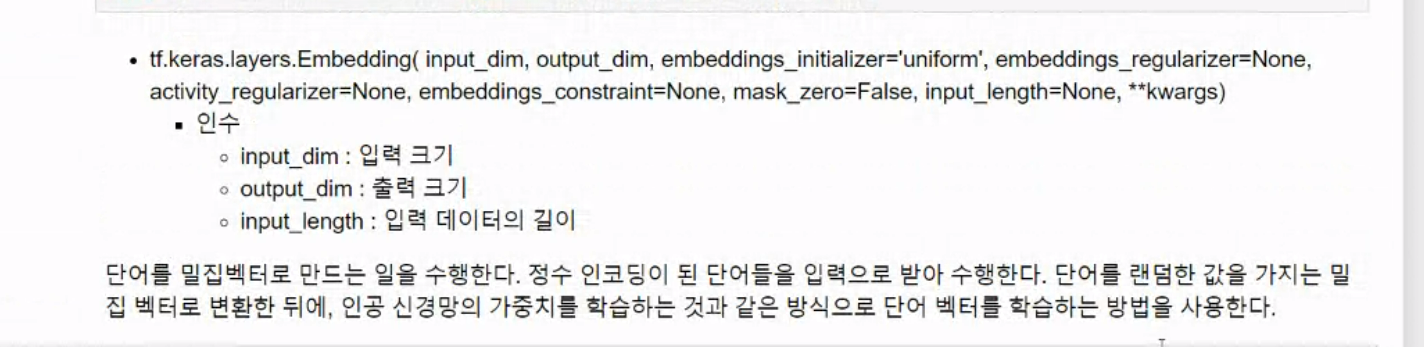

In [22]:
model = Sequential()
model.add(Embedding(vocab_size, 7, input_length=max_len-1)) # vocab_size => 12로 잡혀져 있다
model.add(SimpleRNN(32))
model.add(Dense(vocab_size, activation='softmax'))
model.summary() 


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 5, 7)              84        
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                1280      
                                                                 
 dense_4 (Dense)             (None, 12)                396       
                                                                 
Total params: 1,760
Trainable params: 1,760
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 - 1s - loss: 2.4990 - accuracy: 0.0909 - 559ms/epoch - 559ms/step
Epoch 2/200
1/1 - 0s - loss: 2.4853 - accuracy: 0.0909 - 3ms/epoch - 3ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4715 - accuracy: 0.0909 - 4ms/epoch - 4ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4576 - accuracy: 0.0909 - 6ms/epoch - 6ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4434 - accuracy: 0.0909 - 3ms/e

1/1 - 0s - loss: 1.1205 - accuracy: 0.6364 - 2ms/epoch - 2ms/step
Epoch 94/200
1/1 - 0s - loss: 1.1085 - accuracy: 0.6364 - 3ms/epoch - 3ms/step
Epoch 95/200
1/1 - 0s - loss: 1.0968 - accuracy: 0.6364 - 2ms/epoch - 2ms/step
Epoch 96/200
1/1 - 0s - loss: 1.0853 - accuracy: 0.6364 - 2ms/epoch - 2ms/step
Epoch 97/200
1/1 - 0s - loss: 1.0738 - accuracy: 0.6364 - 3ms/epoch - 3ms/step
Epoch 98/200
1/1 - 0s - loss: 1.0626 - accuracy: 0.6364 - 3ms/epoch - 3ms/step
Epoch 99/200
1/1 - 0s - loss: 1.0514 - accuracy: 0.6364 - 2ms/epoch - 2ms/step
Epoch 100/200
1/1 - 0s - loss: 1.0404 - accuracy: 0.6364 - 3ms/epoch - 3ms/step
Epoch 101/200
1/1 - 0s - loss: 1.0295 - accuracy: 0.6364 - 3ms/epoch - 3ms/step
Epoch 102/200
1/1 - 0s - loss: 1.0186 - accuracy: 0.6364 - 2ms/epoch - 2ms/step
Epoch 103/200
1/1 - 0s - loss: 1.0079 - accuracy: 0.6364 - 2ms/epoch - 2ms/step
Epoch 104/200
1/1 - 0s - loss: 0.9973 - accuracy: 0.6364 - 3ms/epoch - 3ms/step
Epoch 105/200
1/1 - 0s - loss: 0.9867 - accuracy: 0.6364 - 2

Epoch 196/200
1/1 - 0s - loss: 0.2716 - accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 197/200
1/1 - 0s - loss: 0.2667 - accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 198/200
1/1 - 0s - loss: 0.2619 - accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 199/200
1/1 - 0s - loss: 0.2572 - accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 200/200
1/1 - 0s - loss: 0.2525 - accuracy: 1.0000 - 4ms/epoch - 4ms/step


In [25]:
def sentence_generation(model, t, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수 //  t => 단어와 인덱스가 들어있는 객체이다.
    init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장(여기서 처음 단어 => 경마장에)
    sentence = ''
    
    for _ in range(n): # n번 반복 //  _ -> 의미없는 변수(단순히 반복하기 위한 변수이다.)
        encoded = t.texts_to_sequences([current_word])[0] # 현재 단어에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=5, padding='pre') # 데이터에 대한 패딩
        temp = model.predict(encoded)
        result = np.argmax(temp, axis = 1)
        
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.// result와 똑같은 단어를 찾는다.
        for word, index in t.word_index.items(): 
            if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
                break # 해당 단어가 예측 단어이므로 break
        current_word = current_word + ' ' + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        
        sentence = sentence + ' ' + word # 예측 단어를 문장에 저장
    # for문이므로 이 행동을 다시 반복
    
    sentence = init_word + sentence
    return sentence

In [26]:
print(sentence_generation(model, t, '경마장에', 4))
print(sentence_generation(model, t, '그의', 2)) # 2번 예측
print(sentence_generation(model, t, '가는', 5)) # 5번 예측

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 14ms/step
경마장에 있는 말이 뛰고 있다
1/1 [==============================] - 0s 13ms/step
그의 말이 법이다
1/1 [==============================] - 0s 17ms/step
가는 말이 고와야 오는 말이 곱다


## LSTM을 이용하여 텍스트 생성하기


In [27]:
import pandas as pd
from string import punctuation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical


In [30]:
df=pd.read_csv('data/ArticlesApril2018.csv') # 데이터 로드 // 뉴스기사 헤드라인 데이터라고 함
df.head()
print('열의 개수: ',len(df.columns))
print(df.columns)

열의 개수:  15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


In [31]:
df['headline'].isnull().values.any() # 결측치 확인작업

False

In [32]:
headline = [] # 리스트 선언
headline.extend(list(df.headline.values)) # 헤드라인의 값들을 리스트로 저장 // df.headline -> 속성 스타일로 접근
headline[:5] # 상위 5개만 출력 
# 학습대상에 불필요한 . , 등을 제거 해야한다.

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

In [33]:
print('총 샘플의 개수 : {}'.format(len(headline))) # 현재 샘플의 개수

총 샘플의 개수 : 1324


In [34]:
headline = [n for n in headline if n != "Unknown"] # Unknown(잡음) 값을 가진 샘플 제거
print('노이즈값 제거 후 샘플의 개수 : {}'.format(len(headline))) # 제거 후 샘플의 개수


노이즈값 제거 후 샘플의 개수 : 1214


In [35]:
headline[:5] # 5개의 샘플 출력 확인

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

In [ ]:
punctuation# 구두점

In [37]:
def repreprocessing(s):
    s=s.encode("utf8").decode("ascii",'ignore')
    return ''.join(c for c in s if c not in punctuation).lower() # 구두점 제거와 동시에 소문자화
text = [repreprocessing(x) for x in headline]
text[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [38]:
t = Tokenizer()
t.fit_on_texts(text)
vocab_size = len(t.word_index) + 1 # 인덱스 값이 1부터 부여되기 때문에 나중에 원핫인코딩 시에 필요
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 3494


In [39]:
# 학습데이터를 만들어주는 작업이다.
sequences = list() 
for line in text: 
    encoded = t.texts_to_sequences([line])[0] # 각 샘플에 대한 정수 인코딩
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)
sequences[:11] # 11개의 샘플 출력
# 99~ 첫 번째 학습 데이터에 관한 것이다.

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

In [41]:
index_to_word={}
for key, value in t.word_index.items(): # 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
    index_to_word[value] = key 
print('빈도수 상위 582번 단어 : {}'.format(index_to_word[582]))   

빈도수 상위 582번 단어 : offer


In [42]:
max_len=max(len(l) for l in sequences) # 가장 긴 샘플의 길이 확인
print('샘플의 최대 길이 : {}'.format(max_len)) 

샘플의 최대 길이 : 24


In [43]:
# 가장 긴 샘플의 길이인 24로 모든 샘플의 길이를 패딩
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre') 
print(sequences[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


In [44]:
# 분리시키는 작업이다.
sequences = np.array(sequences) 
X = sequences[:,:-1] # 학습 데이터
y = sequences[:,-1] # 정답 데이터
print(X[:3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  99]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  99 269]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  99 269 371]]


In [45]:
print(y[:3]) # 레이블 3개 출력


[ 269  371 1115]


In [46]:
y = to_categorical(y, num_classes=vocab_size) # 레이블 데이터 y에 대해서 원-핫 인코딩 수행
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
# 모델설계하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [48]:
model = Sequential()
# y데이터를 분리하였으므로 이제 X데이터의 길이는 기존 데이터의 길이 - 1
model.add(Embedding(vocab_size, 10, input_length=max_len-1))
model.add(LSTM(128))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)


Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
244/244 - 4s - loss: 7.6424 - accuracy: 0.0285 - 4s/epoch - 16ms/step
Epoch 2/200
244/244 - 3s - loss: 7.1144 - accuracy: 0.0299 - 3s/epoch - 12ms/step
Epoch 3/200
244/244 - 3s - loss: 6.9749 - accuracy: 0.0313 - 3s/epoch - 12ms/step
Epoch 4/200
244/244 - 3s - loss: 6.8581 - accuracy: 0.0396 - 3s/epoch - 12ms/step
Epoch 5/200
244/244 - 3s - loss: 6.7088 - accuracy

Epoch 89/200
244/244 - 3s - loss: 0.8628 - accuracy: 0.8279 - 3s/epoch - 13ms/step
Epoch 90/200
244/244 - 3s - loss: 0.8435 - accuracy: 0.8312 - 3s/epoch - 14ms/step
Epoch 91/200
244/244 - 3s - loss: 0.8255 - accuracy: 0.8360 - 3s/epoch - 14ms/step
Epoch 92/200
244/244 - 4s - loss: 0.8084 - accuracy: 0.8354 - 4s/epoch - 15ms/step
Epoch 93/200
244/244 - 4s - loss: 0.7899 - accuracy: 0.8412 - 4s/epoch - 14ms/step
Epoch 94/200
244/244 - 3s - loss: 0.7742 - accuracy: 0.8470 - 3s/epoch - 14ms/step
Epoch 95/200
244/244 - 4s - loss: 0.7584 - accuracy: 0.8485 - 4s/epoch - 15ms/step
Epoch 96/200
244/244 - 3s - loss: 0.7451 - accuracy: 0.8530 - 3s/epoch - 13ms/step
Epoch 97/200
244/244 - 3s - loss: 0.7289 - accuracy: 0.8522 - 3s/epoch - 13ms/step
Epoch 98/200
244/244 - 3s - loss: 0.7115 - accuracy: 0.8572 - 3s/epoch - 14ms/step
Epoch 99/200
244/244 - 3s - loss: 0.6959 - accuracy: 0.8604 - 3s/epoch - 13ms/step
Epoch 100/200
244/244 - 3s - loss: 0.6819 - accuracy: 0.8611 - 3s/epoch - 13ms/step
Epo

Epoch 187/200
244/244 - 3s - loss: 0.2681 - accuracy: 0.9158 - 3s/epoch - 14ms/step
Epoch 188/200
244/244 - 3s - loss: 0.2700 - accuracy: 0.9152 - 3s/epoch - 14ms/step
Epoch 189/200
244/244 - 3s - loss: 0.2682 - accuracy: 0.9168 - 3s/epoch - 13ms/step
Epoch 190/200
244/244 - 3s - loss: 0.2683 - accuracy: 0.9152 - 3s/epoch - 14ms/step
Epoch 191/200
244/244 - 3s - loss: 0.2664 - accuracy: 0.9168 - 3s/epoch - 14ms/step
Epoch 192/200
244/244 - 3s - loss: 0.2673 - accuracy: 0.9150 - 3s/epoch - 14ms/step
Epoch 193/200
244/244 - 3s - loss: 0.2664 - accuracy: 0.9168 - 3s/epoch - 14ms/step
Epoch 194/200
244/244 - 3s - loss: 0.2651 - accuracy: 0.9158 - 3s/epoch - 14ms/step
Epoch 195/200
244/244 - 3s - loss: 0.2709 - accuracy: 0.9153 - 3s/epoch - 13ms/step
Epoch 196/200
244/244 - 3s - loss: 0.3223 - accuracy: 0.9059 - 3s/epoch - 14ms/step
Epoch 197/200
244/244 - 3s - loss: 0.2788 - accuracy: 0.9143 - 3s/epoch - 14ms/step
Epoch 198/200
244/244 - 3s - loss: 0.2676 - accuracy: 0.9153 - 3s/epoch - 14

In [53]:
def sentence_generation(model, t, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
    sentence = ''
    for _ in range(n): # n번 반복
        encoded = t.texts_to_sequences([current_word])[0] # 현재 단어에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=23, padding='pre') # 데이터에 대한 패딩
        temp = model.predict(encoded)
        result = np.argmax(temp, axis = 1)
        
        for word, index in t.word_index.items(): 
            if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
                break # 해당 단어가 예측 단어이므로 break
        current_word = current_word + ' ' + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        sentence = sentence + ' ' + word # 예측 단어를 문장에 저장
    sentence = init_word + sentence
    return sentence

In [54]:
print(sentence_generation(model, t, 'i', 10)) # 임의의 단어 'i'에 대해서 10개의 단어를 추가 생성
# 임의의 단어 'how'에 대해서 10개의 단어를 추가 생성

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 14ms/step
i disapprove of school vouchers can i still apply for them


In [57]:
print(sentence_generation(model, t, 'how', 10)) # 임의의 단어 'how'에 대해서 10개의 단어를 추가 생성

1/1 [==============================] - 0s 19ms/step
how to make a crossword puzzle economy a surplus of frowns


------------------------------------------------------------------------------------------------------
### konlpy 설치
1. JDK 설치
- 오라클 홈페이지 가서 제품-> 자바->윈도우-> x64 Installer 다운로드
2. Jpype1 설치
- https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
- pip install JPype1-1.3.0-cp37-cp37m-win_amd64.whl
3. konlpy 설치
- pip install konlpy